In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#라벨링 전처리 part

In [ ]:
# 라벨링 데이터 생성시 컨디션과 모드 선택
condition = 3
mode = 2

In [ ]:
if (condition==1):
    raw_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/BABCdata_condition_1.csv')
elif (condition==2):
    print("아직 준비되지 않았습니다.")
elif (condition==3):
    raw_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/BABCdata_condition_3.csv')
else:
    print("올바른 condition이 아닙니다.")

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/BABCdata_condition_1.csv')

In [ ]:
test_data.head()

,Unnamed: 0,TE_r,TE_t,TM_r,TM_t,layer3,n3,k3,d3,layer2,n2,k2,d2,layer1,n1,k1,d1,anlge
0,0,69.8447,9.699340e-77,67.5426,1.123680e-76,3.0,1.7,0.015,0.0,2.0,1.8,0.016,0.0,1.0,0.8808,2.778,1000.0,20.0
1,1,61.7972,1.210240e-76,59.8416,1.369030e-76,3.0,1.7,0.015,0.0,2.0,1.8,0.016,5.0,1.0,0.8808,2.778,1000.0,20.0
2,2,48.8629,1.580240e-76,48.3188,1.718480e-76,3.0,1.7,0.015,0.0,2.0,1.8,0.016,10.0,1.0,0.8808,2.778,1000.0,20.0
3,3,35.0265,1.944880e-76,37.0732,2.027110e-76,3.0,1.7,0.015,0.0,2.0,1.8,0.016,15.0,1.0,0.8808,2.778,1000.0,20.0
4,4,32.2103,1.961420e-76,35.0591,2.022830e-76,3.0,1.7,0.015,0.0,2.0,1.8,0.016,20.0,1.0,0.8808,2.778,1000.0,20.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771561 entries, 0 to 1771560
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   TE_r        float64
 2   TE_t        float64
 3   TM_r        float64
 4   TM_t        float64
 5   layer3      float64
 6   n3          float64
 7   k3          float64
 8   d3          float64
 9   layer2      float64
 10  n2          float64
 11  k2          float64
 12  d2          float64
 13  layer1      float64
 14  n1          float64
 15  k1          float64
 16  d1          float64
 17  anlge       float64
dtypes: float64(17), int64(1)
memory usage: 243.3 MB


In [ ]:
if (mode == 1):
    x_i = raw_data['TE_r'].values
    label = list(map(int,x_i))

    raw_data['label'] = label
elif (mode == 2):
    x_i = raw_data['TM_r'].values
    label = list(map(int,x_i))

    raw_data['label'] = label

In [ ]:
if (condition == 1):
    if (mode == 1):
        raw_data.to_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition1_TE_labeling.csv', mode='a')
    elif (mode == 2):
        raw_data.to_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition1_TM_labeling.csv', mode='a')
elif (condition == 3):
    if (mode == 1):
        raw_data.to_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition3_TE_labeling.csv', mode='a')
    elif (mode == 2):
        raw_data.to_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition3_TM_labeling.csv', mode='a')

#라이브러리 불러오기

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from bayes_opt import BayesianOptimization

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import numpy as np
import cv2

#입력 데이터 설정

In [3]:
# 위의 라벨링 데이터와는 별개의 mode 설정

condition = 3
mode = 1 #  TE: mode =1  , TM: mode=2

if (condition==1):
    if (mode == 1):
        input_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition1_TE_labeling.csv')
    elif (mode == 2):
        input_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition1_TM_labeling.csv')
elif (condition==3):
    if (mode == 1):
        input_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition3_TE_labeling.csv')
    elif (mode == 2):
        input_data = pd.read_csv('/content/drive/My Drive/datasets/LithoAI/20201020_condition3_TM_labeling.csv')

In [4]:
input_data.head()

,Unnamed: 0,Unnamed: 0.1,TE_r,TE_t,TM_r,TM_t,layer3,n3,k3,d3,layer2,n2,k2,d2,layer1,n1,k1,d1,anlge,label
0,0,0,74.0697,8.340380e-77,71.8938,9.730400e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.950,1.0,0.8808,2.778,1000.0,20.0,74
1,1,1,74.0705,8.340130e-77,71.8945,9.730180e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.955,1.0,0.8808,2.778,1000.0,20.0,74
2,2,2,74.0713,8.339880e-77,71.8951,9.729950e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.960,1.0,0.8808,2.778,1000.0,20.0,74
3,3,3,74.0721,8.339630e-77,71.8958,9.729730e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.965,1.0,0.8808,2.778,1000.0,20.0,74
4,4,4,74.0728,8.339380e-77,71.8964,9.729510e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.970,1.0,0.8808,2.778,1000.0,20.0,74


In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771561 entries, 0 to 1771560
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   Unnamed: 0.1  int64  
 2   TE_r          float64
 3   TE_t          float64
 4   TM_r          float64
 5   TM_t          float64
 6   layer3        float64
 7   n3            float64
 8   k3            float64
 9   d3            float64
 10  layer2        float64
 11  n2            float64
 12  k2            float64
 13  d2            float64
 14  layer1        float64
 15  n1            float64
 16  k1            float64
 17  d1            float64
 18  anlge         float64
 19  label         int64  
dtypes: float64(17), int64(3)
memory usage: 270.3 MB


In [6]:
input_data.describe()

,Unnamed: 0,Unnamed: 0.1,TE_r,TE_t,TM_r,TM_t,layer3,n3,k3,d3,layer2,n2,k2,d2,layer1,n1,k1,d1,anlge,label
count,1.771561e+06,1.771561e+06,1.771561e+06,1.771561e+06,1.771561e+06,1.771561e+06,1771561.0,1.771561e+06,1.771561e+06,1.771561e+06,1771561.0,1.771561e+06,1.771561e+06,1.771561e+06,1771561.0,1.771561e+06,1.771561e+06,1771561.0,1771561.0,1.771561e+06
mean,8.857800e+05,8.857800e+05,6.194818e+01,7.356224e-77,5.915469e+01,8.546157e-77,3.0,1.705000e+00,2.500000e-02,4.997500e+01,2.0,1.850000e+00,2.500000e-02,4.997500e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,6.144744e+01
std,5.114058e+05,5.114058e+05,5.177290e+00,3.797077e-78,5.384748e+00,4.651534e-78,0.0,1.581139e-02,1.581139e-02,1.581139e-02,0.0,1.581139e-02,1.581139e-02,1.581139e-02,0.0,1.140632e-11,4.815572e-11,0.0,0.0,5.187881e+00
min,0.000000e+00,0.000000e+00,5.031210e+01,6.500760e-77,4.722680e+01,7.513340e-77,3.0,1.680000e+00,0.000000e+00,4.995000e+01,2.0,1.825000e+00,0.000000e+00,4.995000e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,5.000000e+01
25%,4.428900e+05,4.428900e+05,5.811230e+01,7.080270e-77,5.515840e+01,8.211640e-77,3.0,1.690000e+00,1.000000e-02,4.996000e+01,2.0,1.835000e+00,1.000000e-02,4.996000e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,5.800000e+01
50%,8.857800e+05,8.857800e+05,6.169860e+01,7.346860e-77,5.887560e+01,8.533870e-77,3.0,1.705000e+00,2.500000e-02,4.997500e+01,2.0,1.850000e+00,2.500000e-02,4.997500e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,6.100000e+01
75%,1.328670e+06,1.328670e+06,6.557960e+01,7.627760e-77,6.291890e+01,8.874420e-77,3.0,1.720000e+00,4.000000e-02,4.999000e+01,2.0,1.865000e+00,4.000000e-02,4.999000e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,6.500000e+01
max,1.771560e+06,1.771560e+06,7.465190e+01,8.340380e-77,7.242140e+01,9.730400e-77,3.0,1.730000e+00,5.000000e-02,5.000000e+01,2.0,1.875000e+00,5.000000e-02,5.000000e+01,1.0,8.808000e-01,2.778000e+00,1000.0,20.0,7.400000e+01


#라벨링 설정및 불필요 변수 제거

In [7]:
X_data = input_data.copy()

데이터 경량화(선택)

In [ ]:
# 전체적인 데이터량을 줄여버리는데 그중에 라벨링의 값이 40이 넘는 부분을 버린다.
X_data = X_data[X_data.label < 40]

In [8]:
y = X_data['label']

In [9]:
X_data.head()

,Unnamed: 0,Unnamed: 0.1,TE_r,TE_t,TM_r,TM_t,layer3,n3,k3,d3,layer2,n2,k2,d2,layer1,n1,k1,d1,anlge,label
0,0,0,74.0697,8.340380e-77,71.8938,9.730400e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.950,1.0,0.8808,2.778,1000.0,20.0,74
1,1,1,74.0705,8.340130e-77,71.8945,9.730180e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.955,1.0,0.8808,2.778,1000.0,20.0,74
2,2,2,74.0713,8.339880e-77,71.8951,9.729950e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.960,1.0,0.8808,2.778,1000.0,20.0,74
3,3,3,74.0721,8.339630e-77,71.8958,9.729730e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.965,1.0,0.8808,2.778,1000.0,20.0,74
4,4,4,74.0728,8.339380e-77,71.8964,9.729510e-77,3.0,1.68,0.0,49.95,2.0,1.825,0.0,49.970,1.0,0.8808,2.778,1000.0,20.0,74


In [10]:
X_data.drop('TE_t', axis=1, inplace=True)

In [11]:
X_data.drop('TM_t', axis=1, inplace=True)

In [12]:
X_data.drop('TE_r', axis=1, inplace=True)

In [13]:
X_data.drop('TM_r', axis=1, inplace=True)

In [14]:
X_data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
X_data.drop('Unnamed: 0.1', axis=1, inplace=True)

In [16]:
X_data.drop('label', axis=1, inplace=True)

In [17]:
X_data.drop('layer1', axis=1, inplace=True)

In [18]:
X_data.drop('layer2', axis=1, inplace=True)

In [19]:
X_data.drop('layer3', axis=1, inplace=True)

In [20]:
X_data.head()

,n3,k3,d3,n2,k2,d2,n1,k1,d1,anlge
0,1.68,0.0,49.95,1.825,0.0,49.950,0.8808,2.778,1000.0,20.0
1,1.68,0.0,49.95,1.825,0.0,49.955,0.8808,2.778,1000.0,20.0
2,1.68,0.0,49.95,1.825,0.0,49.960,0.8808,2.778,1000.0,20.0
3,1.68,0.0,49.95,1.825,0.0,49.965,0.8808,2.778,1000.0,20.0
4,1.68,0.0,49.95,1.825,0.0,49.970,0.8808,2.778,1000.0,20.0


#고정변수 제거 (선택?)

In [21]:
X_data.drop('anlge', axis=1 , inplace=True)

In [22]:
X_data.drop('n1', axis=1, inplace=True)

In [23]:
X_data.drop('k1', axis=1, inplace=True)

In [24]:
X_data.drop('d1', axis=1, inplace=True)

In [25]:
X_data.head()

,n3,k3,d3,n2,k2,d2
0,1.68,0.0,49.95,1.825,0.0,49.950
1,1.68,0.0,49.95,1.825,0.0,49.955
2,1.68,0.0,49.95,1.825,0.0,49.960
3,1.68,0.0,49.95,1.825,0.0,49.965
4,1.68,0.0,49.95,1.825,0.0,49.970


# Train Test dataset 분리

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, random_state=1234)

# Labeling 분포 확인

In [27]:
y.value_counts().sort_index()

50      3138
51     17675
52     34300
53     48886
54     63086
55     75863
56     88240
57     99864
58    110119
59    119893
60    129204
61    131467
62    130219
63    119441
64    105656
65     92447
66     81301
67     73726
68     61541
69     48380
70     49390
71     39137
72     15610
73     18337
74     14641
Name: label, dtype: int64

In [28]:
lab = y.values

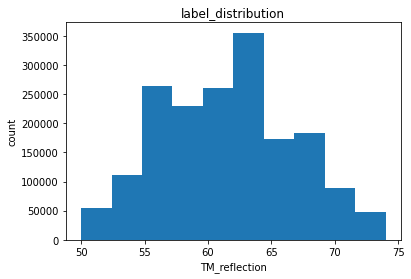

In [29]:
plt.figure()
plt.hist(lab)
plt.title('label_distribution')
plt.xlabel('TM_reflection')
plt.ylabel('count')
#plt.show()
plt.savefig('/content/drive/My Drive/datasets/LithoAI/Condition3_TM.png')

# XGBClassfier 모델 생성

In [ ]:
bst = xgb.XGBClassifier(random_state=1234)

# XGBClassifier 모델의 학습

In [30]:
# subsample 0.8이랑 0.6 차이 확인해보기
bst = xgb.XGBClassifier(n_estimators=280, learning_rate=0.2, max_depth=9, subsample=0.6, random_state=1234)

In [31]:
evals = [(X_test,y_test)]
bst.fit(X_train, y_train, early_stopping_rounds=10, eval_metric = ["mlogloss","merror"], eval_set=evals, verbose=1)

[0]	validation_0-mlogloss:2.04015	validation_0-merror:0.315005
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.61755	validation_0-merror:0.220799
[2]	validation_0-mlogloss:1.37563	validation_0-merror:0.172699
[3]	validation_0-mlogloss:1.21061	validation_0-merror:0.165429
[4]	validation_0-mlogloss:1.05418	validation_0-merror:0.117817
[5]	validation_0-mlogloss:0.941116	validation_0-merror:0.111856
[6]	validation_0-mlogloss:0.82819	validation_0-merror:0.087877
[7]	validation_0-mlogloss:0.726426	validation_0-merror:0.067951
[8]	validation_0-mlogloss:0.638458	validation_0-merror:0.063594
[9]	validation_0-mlogloss:0.564346	validation_0-merror:0.062925
[10]	validation_0-mlogloss:0.502876	validation_0-merror:0.056393
[11]	validation_0-mlogloss:0.454339	validation_0-merror:0.054131
[12]	validation_0-mlogloss:0.409063	validation_0-merror:0.048001
[13]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=280, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

# 모델 검증

In [32]:
y_pred = bst.predict(X_test)
print('정확도 :', accuracy_score(y_test, y_pred.round()))

정확도 : 0.9995032637827366


모델 오류 참고자료

https://github.com/dmlc/xgboost/issues/2073

https://github.com/dmlc/xgboost/issues/3828

# 모델 시각화

Confusion matrix:


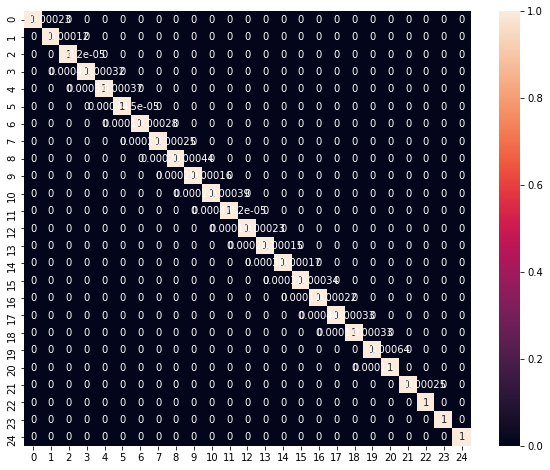

In [33]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float).sum(axis=1)
plt.rcParams['figure.figsize'] = [10,8]
sns.heatmap(cm, annot=True)

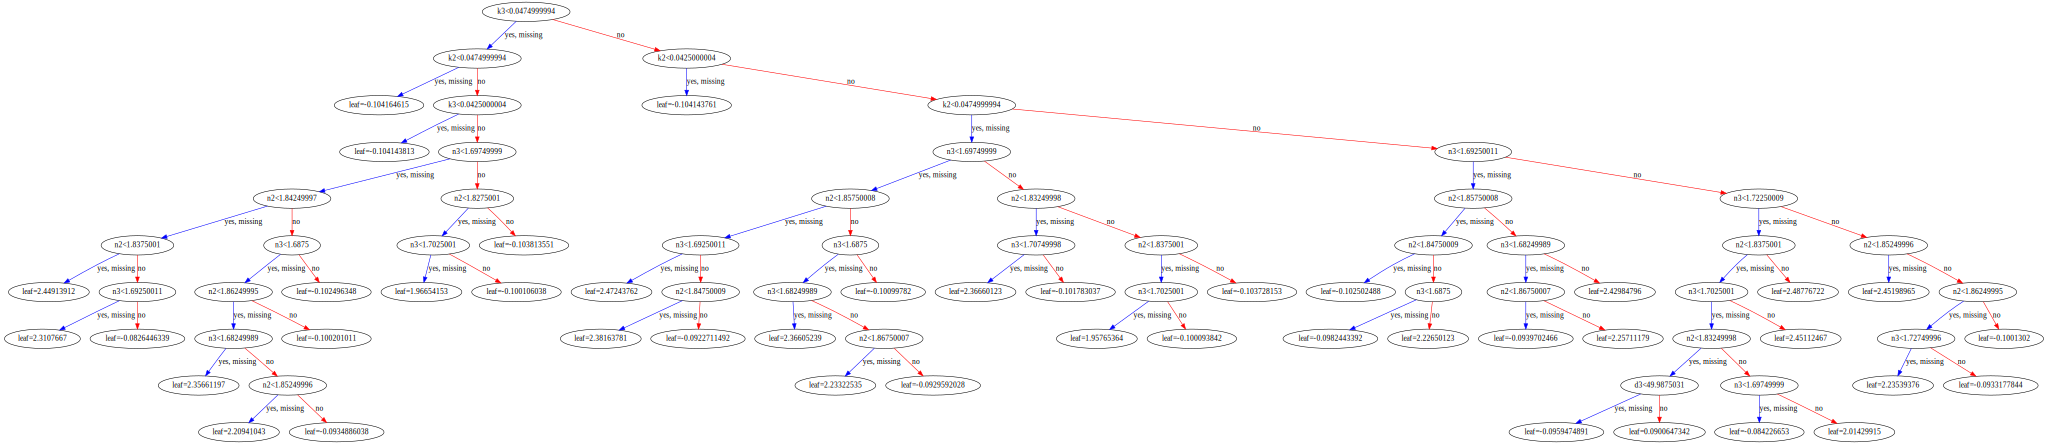

In [34]:
# 방금시험했던 모델에서는 num_trees가 0~1799개 까지 있었다
xgb.to_graphviz(bst, num_trees=1)

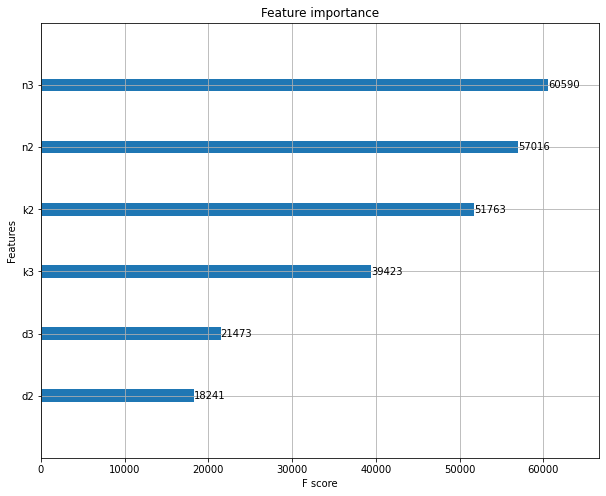

In [35]:
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [10,8]

# 모델 튜닝

GridSearch 방법

In [ ]:
bst_param_grid = {
    'learning_rate' : [0.2, 0.3, 0.4],
    'max_depth' : [2, 3, 4],
}

bst_grid = GridSearchCV(bst, param_grid= bst_param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
bst_grid.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
bst_grid_df = pd.DataFrame(bst_grid.cv_results_)
bst_grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_objective,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,75.608240,0.832305,1.348749,0.115887,multi:softmax,0.8,"{'objective': 'multi:softmax', 'subsample': 0.8}",0.676148,0.674460,0.673295,0.673001,0.671627,0.673706,0.001518,1
1,73.878399,1.876389,1.403999,0.083488,multi:softmax,1,"{'objective': 'multi:softmax', 'subsample': 1.0}",0.671574,0.666039,0.664658,0.664206,0.665070,0.666309,0.002701,3
2,74.607954,1.205587,1.323776,0.017499,multi:softprop,0.8,"{'objective': 'multi:softprop', 'subsample': 0.8}",0.676148,0.674460,0.673295,0.673001,0.671627,0.673706,0.001518,1
3,70.423602,1.615222,1.237543,0.194245,multi:softprop,1,"{'objective': 'multi:softprop', 'subsample': 1.0}",0.671574,0.666039,0.664658,0.664206,0.665070,0.666309,0.002701,3


베이지안 최적화 방법

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=4e4842a50d20b40d8285ae43f9ff33f43e72a6dff484fc4be7ac924809d756f0
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


https://www.kaggle.com/toastls93/bayes-optimization-xgb#XGB---learning_rate,-max_depth-%EB%93%B1-%EC%B5%9C%EC%A0%81%ED%99%94-%ED%95%98%EA%B8%B0

In [ ]:
def XGB_cv(max_depth,learning_rate, n_estimators, gamma
           ,min_child_weight, max_delta_step, subsample
           ,colsample_bytree, silent=True, nthread=-1):
    model = xgb.XGBClassifier(max_depth=int(max_depth),
                              learning_rate=learning_rate,
                              n_estimators=int(n_estimators),
                              silent=silent,
                              nthread=nthread,
                              gamma=gamma,
                              min_child_weight=min_child_weight,
                              max_delta_step=max_delta_step,
                              subsample=subsample,
                              colsample_bytree=colsample_bytree)
    RMSE = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=4).mean()
    return -RMSE

pbounds = {'max_depth': (5, 10),
          'learning_rate': (0.01, 0.3),
          'n_estimators': (50, 1000),
          'gamma': (1., 0.01),
          'min_child_weight': (1, 10),
          'max_delta_step': (0, 0.1),
          'subsample': (0.6, 0.9),
          'colsample_bytree' :(0.5, 0.99)
          }

xgboostBO = BayesianOptimization(f = XGB_cv,pbounds = pbounds, verbose = 2, random_state = 1234 )

# 메소드를 이용해 최대화!
xgboostBO.maximize(init_points=2, n_iter = 10)

xgboostBO.max

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -0.5377   |  0.5938   |  0.3841   |  0.1369   |  0.07854  |  8.9      |  3.453    |  312.6    |  0.8406   |
|  2        | -0.6369   |  0.9695   |  0.1328   |  0.1138   |  0.0501   |  8.417    |  7.414    |  401.7    |  0.7684   |
|  3        | -0.1859   |  0.556    |  0.01     |  0.06995  |  0.04435  |  5.82     |  6.244    |  50.04    |  0.7004   |
|  4        | -0.1801   |  0.5901   |  0.01     |  0.09931  |  0.008554 |  9.612    |  3.407    |  50.42    |  0.7209   |
|  5        | -0.6598   |  0.6004   |  0.01     |  0.2578   |  0.03073  |  9.78     |  2.304    |  999.6    |  0.6251   |
|  6        | -0.2064   |  0.5291   |  0.01     |  0.2395   |  0.03506  |  5.121    |  1.268    |  50.54    |  0.6383   |
|  7        | -0.3714   

{'params': {'colsample_bytree': 0.8506945992820225,
  'gamma': 0.01,
  'learning_rate': 0.1448396938292427,
  'max_delta_step': 0.03771802050604797,
  'max_depth': 9.890127006274056,
  'min_child_weight': 9.110813179479896,
  'n_estimators': 50.57849069226247,
  'subsample': 0.8034242734858654},
 'target': -0.17580640095480382}

In [ ]:
fit_xgb = xgb.XGBClassifier(max_depth= int( xgboostBO.max['params']['max_depth'] ),
                             learning_rate=xgboostBO.max['params']['learning_rate'],
                             n_estimators=int(xgboostBO.max['params']['n_estimators']),
                             gamma= xgboostBO.max['params']['gamma'],
                             min_child_weight=xgboostBO.max['params']['min_child_weight'],
                             max_delta_step=xgboostBO.max['params']['max_delta_step'],
                             subsample=xgboostBO.max['params']['subsample'],
                             colsample_bytree=xgboostBO.max['params']['colsample_bytree'])

In [ ]:
model  = fit_xgb.fit(X,y)

# 모델 저장

제대로 저장이 안되는 느낌
colab 환경이라 그런가?

In [ ]:
bst.save_model('/content/drive/My Drive/datasets/model.bst')

# 모델 저장및 불러오기 위해서 필요한 툴

https://colab.research.google.com/github/pair-code/what-if-tool/blob/master/xgboost_caip_e2e.ipynb

In [ ]:
import sys
python_version = sys.version_info[0]

In [ ]:
# If you're running on Colab, you'll need to install the What-if Tool package and authenticate
# If you're on Cloud AI Platform Notebooks, you'll need to install XGBoost on the TF instance
def pip_install(module):
    if python_version == '2':
        !pip install {module} --quiet
    else:
        !pip3 install {module} --quiet

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    pip_install('witwidget')

    from google.colab import auth
    auth.authenticate_user()
else:
    pip_install('xgboost')

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [ ]:
import numpy as np
import collections
import witwidget

from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [ ]:
# Define some globals - update these to your own project + model names
GCP_PROJECT = 'YOUR_GCP_PROJECT'
MODEL_BUCKET = 'gs://your_storage_bucket'
MODEL_NAME = 'case1' # You'll create this model below
VERSION_NAME = 'v1'

In [ ]:
# Copy your model file to Cloud Storage
!gsutil cp ./model.bst $MODEL_BUCKET

Copying file://./model.bst [Content-Type=application/octet-stream]...
NotFoundException: 404 The destination bucket gs://your_storage_bucket does not exist or the write to the destination must be restarted


In [ ]:
# Configure gcloud to use your project
!gcloud config set project $GCP_PROJECT

In [ ]:
# Create a model
!gcloud ai-platform models create $MODEL_NAME

In [ ]:
# Create a version, this will take ~2 minutes to deploy
!gcloud ai-platform versions create $VERSION_NAME \
--model=$MODEL_NAME \
--framework='XGBOOST' \
--runtime-version=1.14 \
--origin=$MODEL_BUCKET \
--python-version=3.5 \
--project=$GCP_PROJECT

In [ ]:
# Format a subset of the test data to send to the What-if Tool for visualization
# Append ground truth label value to training data

# This is the number of examples you want to display in the What-if Tool
num_wit_examples = 500
test_examples = np.hstack((X_test[:num_wit_examples].values,y_test[:num_wit_examples].reshape(-1,1)))

In [ ]:
# Create a What-if Tool visualization, it may take a minute to load
# See the cell below this for exploration ideas

# This prediction adjustment function is needed as this xgboost model's
# prediction returns just a score for the positive class of the binary
# classification, whereas the What-If Tool expects a list of scores for each
# class (in this case, both the negative class and the positive class).
def adjust_prediction(pred):
  return [1 - pred, pred]

config_builder = (WitConfigBuilder(test_examples.tolist(), data.columns.tolist() + ['mortgage_status'])
  .set_ai_platform_model(GCP_PROJECT, MODEL_NAME, VERSION_NAME, adjust_prediction=adjust_prediction)
  .set_target_feature('mortgage_status')
  .set_label_vocab(['denied', 'approved']))
WitWidget(config_builder, height=800)

# 모델 로드

In [ ]:
xgbc = xgb.XGBClassifier(random_state=1234)
xgbc.load_model('/content/drive/My Drive/datasets/model.bst')